# **Zepto Sales Analysis**

In [1]:
# import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
# import data

df = pd.read_csv('zepto_sales_dataset.csv')

In [110]:
df

,Product Name,Category,City,Original Price,Current Price,Discount,Orders,Total Revenue,Influencer Active
0,Britannia Cake,Snacks,Delhi,148,163,5,283,44714,No
1,Britannia Cake,Snacks,Pune,81,86,10,284,21584,Yes
2,Fortune Oil 1L,Grocery,Hyderabad,138,143,10,69,9177,No
3,Pepsi 500ml,Beverages,Delhi,127,127,10,83,9711,No
4,Aashirvaad Atta,Grocery,Chennai,34,49,10,169,6591,Yes
...,...,...,...,...,...,...,...,...,...
295,Britannia Cake,Snacks,Pune,198,198,5,52,10036,Yes
296,Amul Milk 500ml,Dairy,Hyderabad,131,146,10,146,19856,No
297,Oreo Biscuits,Snacks,Delhi,171,176,10,291,48306,No
298,Amul Milk 500ml,Dairy,Mumbai,94,99,0,124,12276,No


In [111]:
df.head()

,Product Name,Category,City,Original Price,Current Price,Discount,Orders,Total Revenue,Influencer Active
0,Britannia Cake,Snacks,Delhi,148,163,5,283,44714,No
1,Britannia Cake,Snacks,Pune,81,86,10,284,21584,Yes
2,Fortune Oil 1L,Grocery,Hyderabad,138,143,10,69,9177,No
3,Pepsi 500ml,Beverages,Delhi,127,127,10,83,9711,No
4,Aashirvaad Atta,Grocery,Chennai,34,49,10,169,6591,Yes


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Product Name       300 non-null    object
 1   Category           300 non-null    object
 2   City               300 non-null    object
 3   Original Price     300 non-null    int64 
 4   Current Price      300 non-null    int64 
 5   Discount           300 non-null    int64 
 6   Orders             300 non-null    int64 
 7   Total Revenue      300 non-null    int64 
 8   Influencer Active  300 non-null    object
dtypes: int64(5), object(4)
memory usage: 21.2+ KB


In [113]:
df.describe()

,Original Price,Current Price,Discount,Orders,Total Revenue
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,111.866667,119.200000,4.916667,168.153333,19277.836667
std,49.936102,50.462543,4.179468,74.258541,12744.470724
min,20.000000,21.000000,0.000000,50.000000,1392.000000
25%,71.750000,78.000000,0.000000,103.750000,9025.250000
50%,115.000000,120.500000,5.000000,161.500000,16227.000000
75%,151.500000,161.000000,10.000000,233.750000,27396.000000
max,199.000000,213.000000,10.000000,299.000000,58212.000000


In [114]:
df.columns

Index(['Product Name', 'Category', 'City', 'Original Price', 'Current Price',
       'Discount', 'Orders', 'Total Revenue', 'Influencer Active'],
      dtype='object')

In [115]:
df.isnull().sum()

Product Name         0
Category             0
City                 0
Original Price       0
Current Price        0
Discount             0
Orders               0
Total Revenue        0
Influencer Active    0
dtype: int64

In [116]:
df.duplicated().sum()

0

In [17]:
# df['Influencer Active'] = df['Influencer Active'].astype(bool)

In [117]:
df.rename(columns={'Discount': 'Discount Price'}, inplace=True)

In [118]:
df.head()

,Product Name,Category,City,Original Price,Current Price,Discount Price,Orders,Total Revenue,Influencer Active
0,Britannia Cake,Snacks,Delhi,148,163,5,283,44714,No
1,Britannia Cake,Snacks,Pune,81,86,10,284,21584,Yes
2,Fortune Oil 1L,Grocery,Hyderabad,138,143,10,69,9177,No
3,Pepsi 500ml,Beverages,Delhi,127,127,10,83,9711,No
4,Aashirvaad Atta,Grocery,Chennai,34,49,10,169,6591,Yes


In [119]:
df[['Original Price','Current Price', 'Discount Price','Orders','Total Revenue']].head()

,Original Price,Current Price,Discount Price,Orders,Total Revenue
0,148,163,5,283,44714
1,81,86,10,284,21584
2,138,143,10,69,9177
3,127,127,10,83,9711
4,34,49,10,169,6591


In [120]:
df['Discount Price'].value_counts()

Discount Price
0     107
10    102
5      91
Name: count, dtype: int64

## **Visualization**

#### Boxplot of discount % by category

         Category  Discount Price  count
0          Snacks               0     33
1          Snacks              10     31
2       Beverages               0     24
3       Beverages               5     23
4         Grocery               5     20
5       Beverages              10     19
6         Grocery               0     19
7          Snacks               5     18
8         Grocery              10     17
9   Confectionery              10     14
10   Instant Food               0     13
11   Instant Food               5     13
12          Dairy              10     11
13  Confectionery               0     10
14   Instant Food              10     10
15          Dairy               5      9
16  Confectionery               5      8
17          Dairy               0      8


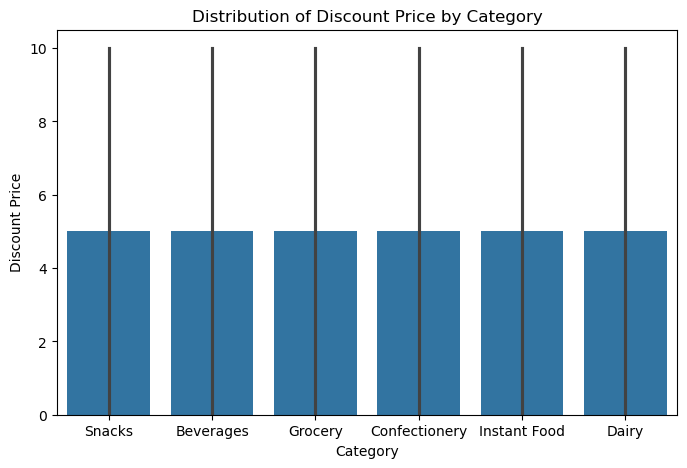

In [121]:
count_category = df[['Category', 'Discount Price']].value_counts().reset_index(name='count')

print(count_category)

# category_plt = sns.barplot(x ='Category', y ='Discount Price', data=count_category)

plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Discount Price', data=count_category)
plt.title('Distribution of Discount Price by Category')
plt.show()

# plt.show()

#### Revenue distribution by City

        City  Total Revenue
0  Bangalore        1019724
1    Chennai         834726
2      Delhi         884943
3  Hyderabad        1250930
4     Mumbai         799190
5       Pune         993838


Text(0.5, 1.0, 'Revenue distribution by City')

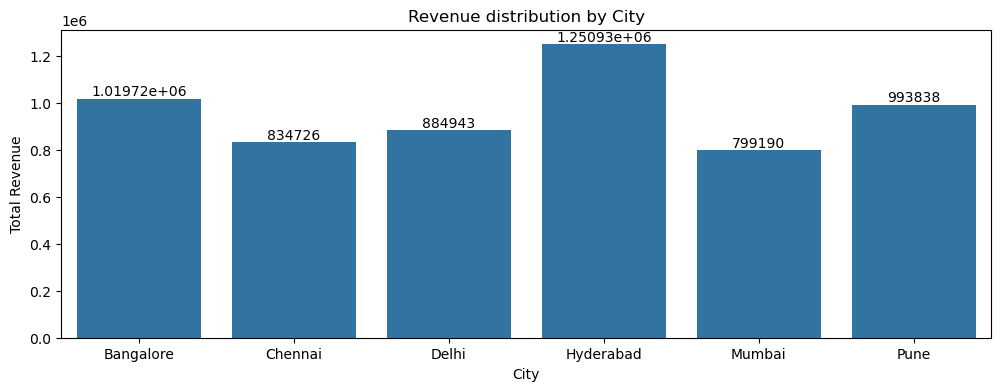

In [122]:
revenue_plt = df.groupby('City', as_index=False)['Total Revenue'].sum()
print(revenue_plt)

plt.figure(figsize=(12,4))
barplt = sns.barplot(x='City', y='Total Revenue', data=revenue_plt)

for bars in barplt.containers:
    barplt.bar_label(bars)

plt.title('Revenue distribution by City')


#### Correlation between discount, price, revenue, orders

In [123]:
df.head()

,Product Name,Category,City,Original Price,Current Price,Discount Price,Orders,Total Revenue,Influencer Active
0,Britannia Cake,Snacks,Delhi,148,163,5,283,44714,No
1,Britannia Cake,Snacks,Pune,81,86,10,284,21584,Yes
2,Fortune Oil 1L,Grocery,Hyderabad,138,143,10,69,9177,No
3,Pepsi 500ml,Beverages,Delhi,127,127,10,83,9711,No
4,Aashirvaad Atta,Grocery,Chennai,34,49,10,169,6591,Yes


Text(0.5, 1.0, 'Correlation between discount, price, revenue, orders')

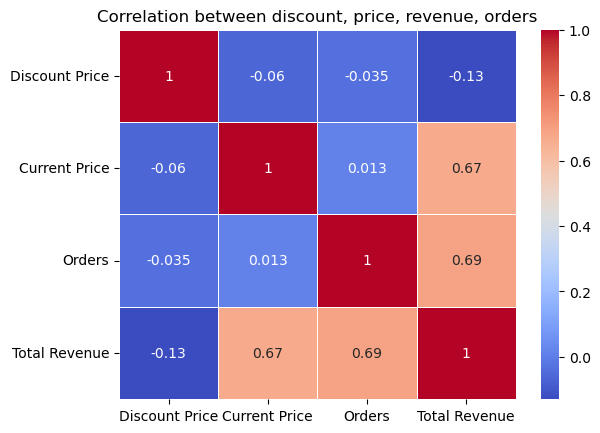

In [124]:
numeric_cols = df[['Discount Price', 'Current Price', 'Orders', 'Total Revenue']]

# Compute correlation matrix
corr = numeric_cols.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between discount, price, revenue, orders')

#### Orders vs Influencer Active

Text(0.5, 1.0, 'Orders vs Influencer Active')

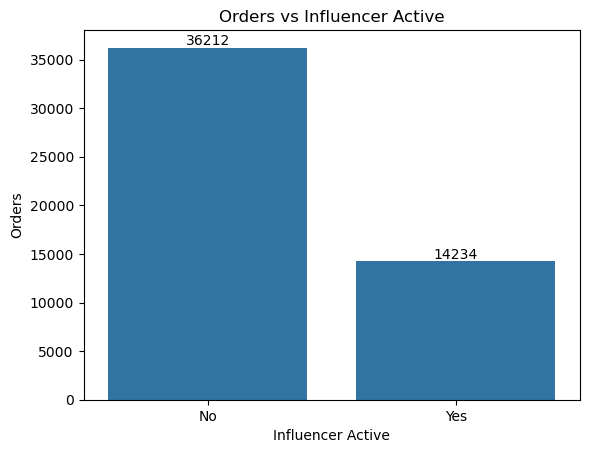

In [129]:
influencer = df.groupby('Influencer Active', as_index=False)['Orders'].sum()

influencer_plt = sns.barplot(x='Influencer Active', y = 'Orders', data=influencer)

for bars in influencer_plt.containers:
    influencer_plt.bar_label(bars)

plt.title('Orders vs Influencer Active')

#### Price, Orders, Revenue relationship

In [130]:
df.head()

,Product Name,Category,City,Original Price,Current Price,Discount Price,Orders,Total Revenue,Influencer Active
0,Britannia Cake,Snacks,Delhi,148,163,5,283,44714,No
1,Britannia Cake,Snacks,Pune,81,86,10,284,21584,Yes
2,Fortune Oil 1L,Grocery,Hyderabad,138,143,10,69,9177,No
3,Pepsi 500ml,Beverages,Delhi,127,127,10,83,9711,No
4,Aashirvaad Atta,Grocery,Chennai,34,49,10,169,6591,Yes


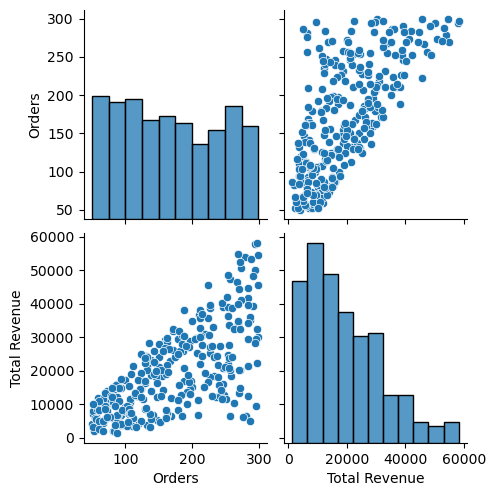

In [133]:
relationship = df[['Orders' , 'Total Revenue']]

sns.pairplot(relationship)